# ML Project: Asian Recipe Analysis

In America, **Asian Food** is often thought of as simply takeout, limited to dishes like Beef with Broccoli and General Tso's Chicken. Of course, these are an integral part to the history of Chinese-Americans in the US, but there are thousands of delicious recipes out there from every culture, from Japanese to Korean to Thai. In this ML Project, I attempt to highlight the diversity of these dishes and discover correlations between ingredients, reviews, preparation time, and calorie count.

All data is scraped from thewoksoflife.com using a custom-built recipe scraper located in the same repository as this Jupyter Notebook. This dataset is roughly scraped, with many missing values and duplicates. The original dataset consists of 1450 recipes with 9 features, including Name, Prep Time, Cook Time, Total Time, Ingredients, Calories, Average Rating, Review Count, and URL.

In [198]:
import pandas as pd

data = pd.read_csv("Recipes.csv")
display(data)

,Average Rating,Calories,Category,Cook Time,Ingredients,Name,Prep Time,Review Count,Total Time,URL
0,4.80,294 kcal,Soups,PT165M,"15 grams dried seaweed ((haidai, 海带, also known as kelp or kombu - sliced into thin strips, a small handful))', '1 cup raw shelled peanuts ((150g))', '1 1/2 pounds chicken feet ((700g))', '2 tablespoons Shaoxing wine', '4 slices ginger', '12 cups water ((2800 ml))', 'salt ((to taste))', '1 scallion ((chopped))",Cantonese Chicken Feet Soup,PT60M,5.0,PT225M,https://thewoksoflife.com/cantonese-chicken-feet-soup/
1,4.80,346 kcal,Chicken,PT40M,"3 pounds whole chicken wings ((about 14 wings))', '1-2 tablespoons white pepper powder ((divided))', '2 teaspoons salt ((divided))', '1 teaspoon Sichuan peppercorn powder ((optional))', '2 teaspoons vegetable oil ((plus more for brushing))', '1/2 cup all purpose flour', '1/4 cup cornstarch",Baked White Pepper Chicken Wings,PT30M,10.0,PT70M,https://thewoksoflife.com/baked-white-pepper-chicken-wings/
2,4.84,306 kcal,Noodles and Pasta,PT10M,"8 oz. boneless skinless chicken thighs ((225g, cut into thin strips))', '2 teaspoons cornstarch', '2 teaspoons water', '2 teaspoons oil ((plus more for cooking))', '1 clove garlic ((minced))', '4 cups cabbage ((shredded))', '2 medium carrots ((julienned))', '1 tablespoon shaoxing wine ((or dry sherry cooking wine))', '16 oz. fresh lo mein egg noodles ((450g))', '1 tablespoon soy sauce', '4 teaspoons dark soy sauce', '1 teaspoon sesame oil', '1/8 teaspoon salt', '1/8 teaspoon sugar', '2 cups mung bean sprouts', '2 scallions ((julienned))",Restaurant-Style Chicken Lo Mein,PT20M,25.0,PT30M,https://thewoksoflife.com/chicken-lo-mein/
3,5.00,206 kcal,Chicken,PT20M,"3 scallions ((cut into 2-inch long pieces, with the white and green parts separated))', '4 cloves garlic ((cut in half))', '6 slices ginger ((1/4 inch thick))', '1 tablespoon vegetable oil ((can substitute canola oil or avocado oil))', '24 ounces boneless skinless chicken thighs ((680g, cut into 1-inch chunks))', '3 shallots ((cut into quarters))', '1/4 cup Shaoxing wine', '1 1/2 cups low sodium chicken stock', '1 teaspoon light brown sugar', '2 tablespoons soy sauce', '1 teaspoon dark soy sauce', '1/4 teaspoon white pepper', '2 teaspoons oyster sauce ((optional))', '1 tablespoon cornstarch ((mixed with 1 tablespoon water))",Ginger Chicken,PT10M,6.0,PT30M,https://thewoksoflife.com/ginger-chicken/
4,4.87,293 kcal,Chicken and Poultry,PT5M,"2 chicken breasts ((about 12 ounces/340g, cut into 1/8-inch thick slices))', '3 tablespoons water', '3 teaspoons cornstarch', '1 teaspoon oil', '2 teaspoons light soy sauce', '3 tablespoons oil ((divided))', '3 slices ginger ((julienned))', '3 cloves garlic ((smashed and chopped))', '3 scallions ((chopped and separated into white and green parts))', '3 tablespoons fermented black beans ((washed and drained))', '1 green bell pepper ((cut into bite-sized pieces))', '1 red bell pepper ((cut into bite-sized pieces))', '½ teaspoon sugar', '1 tablespoon Shaoxing wine', '¼ teaspoon salt ((or to taste))', '2 tablespoons water",Chicken with Black Bean Sauce,PT35M,15.0,PT40M,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1447,5.00,327 kcal,Vegetables,PT10M,"1 package mung bean vermicelli', '½ of a small head of cabbage ((cut into ¼-inch strips))', '2 eggs', 'Salt', '1/2 teaspoon sesame oil ((plus an extra dash))', '1 tablespoon shaoxing wine ((plus an extra dash))', 'Oil', '3-5 dried red chilis ((break them open if you want more heat))', '2 cloves garlic ((finely chopped))', '1 scallion ((sliced))', '¼ teaspoon white pepper', '½ teaspoon soy sauce",Cabbage and Glass Noodles,PT10M,3.0,PT20M,https://thewoksoflife.com/cabbage-and-glass-noodle-stir-fry/
1448,4.00,554 kcal,Chicken and Poultry,PT45M,"6 boneless chicken thighs ((skin on and fat trimmed))', '1 large shallot ((finely chopped))', '1 clove garlic ((minced))', '1 ½ tablespoons soy sauce (plus 1 teaspoon)', '1 tablespoon Shaoxing wine', '1 teaspoon five s

## Data Cleaning
As you may see, this file needs a lot of cleaning. We need to rearrange the columns in a sensible way, clean the ingredients section, convert the time into minutes, drop duplicates, and deal with missing values.

In [199]:
data.dtypes

Average Rating    float64
Calories          object 
Category          object 
Cook Time         object 
Ingredients       object 
Name              object 
Prep Time         object 
Review Count      float64
Total Time        object 
URL               object 
dtype: object

In [200]:
# Rearranging Columns
data = data[['Name', 'Category', 'Prep Time', 'Cook Time', 'Total Time', 'Ingredients', 'Calories', 'Average Rating', 
             'Review Count', 'URL']]

# Convert time to a more understandable format
data['Prep Time'] = data['Prep Time'].replace({"PT":''}, regex=True)  
data['Cook Time'] = data['Cook Time'].replace({"PT":''}, regex=True)
data['Total Time'] = data['Total Time'].replace({"PT":''}, regex=True)
data['Calories'] = data['Calories'].replace({"kcal": ''}, regex=True)
data["Calories"] = pd.to_numeric(data["Calories"])
display(data)

,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Cantonese Chicken Feet Soup,Soups,60M,165M,225M,"15 grams dried seaweed ((haidai, 海带, also known as kelp or kombu - sliced into thin strips, a small handful))', '1 cup raw shelled peanuts ((150g))', '1 1/2 pounds chicken feet ((700g))', '2 tablespoons Shaoxing wine', '4 slices ginger', '12 cups water ((2800 ml))', 'salt ((to taste))', '1 scallion ((chopped))",294.0,4.80,5.0,https://thewoksoflife.com/cantonese-chicken-feet-soup/
1,Baked White Pepper Chicken Wings,Chicken,30M,40M,70M,"3 pounds whole chicken wings ((about 14 wings))', '1-2 tablespoons white pepper powder ((divided))', '2 teaspoons salt ((divided))', '1 teaspoon Sichuan peppercorn powder ((optional))', '2 teaspoons vegetable oil ((plus more for brushing))', '1/2 cup all purpose flour', '1/4 cup cornstarch",346.0,4.80,10.0,https://thewoksoflife.com/baked-white-pepper-chicken-wings/
2,Restaurant-Style Chicken Lo Mein,Noodles and Pasta,20M,10M,30M,"8 oz. boneless skinless chicken thighs ((225g, cut into thin strips))', '2 teaspoons cornstarch', '2 teaspoons water', '2 teaspoons oil ((plus more for cooking))', '1 clove garlic ((minced))', '4 cups cabbage ((shredded))', '2 medium carrots ((julienned))', '1 tablespoon shaoxing wine ((or dry sherry cooking wine))', '16 oz. fresh lo mein egg noodles ((450g))', '1 tablespoon soy sauce', '4 teaspoons dark soy sauce', '1 teaspoon sesame oil', '1/8 teaspoon salt', '1/8 teaspoon sugar', '2 cups mung bean sprouts', '2 scallions ((julienned))",306.0,4.84,25.0,https://thewoksoflife.com/chicken-lo-mein/
3,Ginger Chicken,Chicken,10M,20M,30M,"3 scallions ((cut into 2-inch long pieces, with the white and green parts separated))', '4 cloves garlic ((cut in half))', '6 slices ginger ((1/4 inch thick))', '1 tablespoon vegetable oil ((can substitute canola oil or avocado oil))', '24 ounces boneless skinless chicken thighs ((680g, cut into 1-inch chunks))', '3 shallots ((cut into quarters))', '1/4 cup Shaoxing wine', '1 1/2 cups low sodium chicken stock', '1 teaspoon light brown sugar', '2 tablespoons soy sauce', '1 teaspoon dark soy sauce', '1/4 teaspoon white pepper', '2 teaspoons oyster sauce ((optional))', '1 tablespoon cornstarch ((mixed with 1 tablespoon water))",206.0,5.00,6.0,https://thewoksoflife.com/ginger-chicken/
4,Chicken with Black Bean Sauce,Chicken and Poultry,35M,5M,40M,"2 chicken breasts ((about 12 ounces/340g, cut into 1/8-inch thick slices))', '3 tablespoons water', '3 teaspoons cornstarch', '1 teaspoon oil', '2 teaspoons light soy sauce', '3 tablespoons oil ((divided))', '3 slices ginger ((julienned))', '3 cloves garlic ((smashed and chopped))', '3 scallions ((chopped and separated into white and green parts))', '3 tablespoons fermented black beans ((washed and drained))', '1 green bell pepper ((cut into bite-sized pieces))', '1 red bell pepper ((cut into bite-sized pieces))', '½ teaspoon sugar', '1 tablespoon Shaoxing wine', '¼ teaspoon salt ((or to taste))', '2 tablespoons water",293.0,4.87,15.0,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1447,Cabbage and Glass Noodles,Vegetables,10M,10M,20M,"1 package mung bean vermicelli', '½ of a small head of cabbage ((cut into ¼-inch strips))', '2 eggs', 'Salt', '1/2 teaspoon sesame oil ((plus an extra dash))', '1 tablespoon shaoxing wine ((plus an extra dash))', 'Oil', '3-5 dried red chilis ((break them open if you want more heat))', '2 cloves garlic ((finely chopped))', '1 scallion ((sliced))', '¼ teaspoon white pepper', '½ teaspoon soy sauce",327.0,5.00,3.0,https://thewoksoflife.com/cabbage-and-glass-noodle-stir-fry/
1448,Roasted Chicken with Sticky Rice,Chicken and Poultry,120M,45M,165M,"6 boneless chicken thighs ((skin on and fat trimmed))', '1 large shallot ((finely chopped))', '1 clove garlic ((minced))', '1 ½ tablespoons soy sauce (plus 1 teaspoon)', '1 tablespoon Shaoxing wine', '1 teaspoon five spice powder', '1 teaspoon s

In [201]:
# Drop Duplicate Recipes
orig_rows = data.shape[0]
data = data.drop_duplicates()
new_rows = data.shape[0]
print("Number of duplicate rows: ", abs(new_rows - orig_rows))

Number of duplicate rows:  620


In [202]:
# The format of the ingredients looks wacky, let's take a full look at them!
# pd.set_option('display.max_colwidth', -1)
# display(data)

In [203]:
# It looks like we have a number of issues: there seem to be double parenthesis, single parenthesis, numbers, fractions, 
# periods,dashes, slashes, and apostrophes.
# Our goal is to visualize the ingredients used and discover trends: numbers & measurements interfere with that, so we will
# remove them. The strings_to_remove list contains regex strings representing the above strings. 
# We simply want a string containing ingredients separated by a comma.

# TODO: figure out how to properly remove all fractions, as well as ensure all measurement words are eliminated

def remove_string(df, col_name, string_to_remove):
    df[col_name] = df[col_name].str.replace(string_to_remove, '')
    
strings_to_remove = [r"\(([^()]*\))", r"\([^()]*\)", '\d+', r'\d+\/\d+', '.', '-', '/', "'"]
for num_strings in range(len(strings_to_remove)):
    remove_string(data, 'Ingredients', strings_to_remove[num_strings])

remove_measurements = ['gram', 'grams', 'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'oz', 
                       'slices', 'slice', 'pound', 'pounds', 'sheets', 'sheet', 'cloves', 'packages', 'ounce', 'ounces', 
                       'handful of', 'chopped']

remove_words = r'\b(?:{})\b'.format('|'.join(remove_measurements))
data['Ingredients'] = data['Ingredients'].str.replace(remove_words, '')   # Remove measurement words
data['Ingredients'] = data['Ingredients'].str.lower()                     # Standardize ingredient names by lowercasing everything

display(data)

,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Cantonese Chicken Feet Soup,Soups,60M,165M,225M,"dried seaweed , raw shelled peanuts , chicken feet , shaoxing wine, ginger, water , salt , scallion",294.0,4.80,5.0,https://thewoksoflife.com/cantonese-chicken-feet-soup/
1,Baked White Pepper Chicken Wings,Chicken,30M,40M,70M,"whole chicken wings , white pepper powder , salt , sichuan peppercorn powder , vegetable oil , all purpose flour, cornstarch",346.0,4.80,10.0,https://thewoksoflife.com/baked-white-pepper-chicken-wings/
2,Restaurant-Style Chicken Lo Mein,Noodles and Pasta,20M,10M,30M,"boneless skinless chicken thighs , cornstarch, water, oil , clove garlic , cabbage , medium carrots , shaoxing wine , fresh lo mein egg noodles , soy sauce, dark soy sauce, sesame oil, salt, sugar, mung bean sprouts, scallions",306.0,4.84,25.0,https://thewoksoflife.com/chicken-lo-mein/
3,Ginger Chicken,Chicken,10M,20M,30M,"scallions , garlic , ginger , vegetable oil , boneless skinless chicken thighs , shallots , shaoxing wine, low sodium chicken stock, light brown sugar, soy sauce, dark soy sauce, white pepper, oyster sauce , cornstarch",206.0,5.00,6.0,https://thewoksoflife.com/ginger-chicken/
4,Chicken with Black Bean Sauce,Chicken and Poultry,35M,5M,40M,"chicken breasts , water, cornstarch, oil, light soy sauce, oil , ginger , garlic , scallions , fermented black beans , green bell pepper , red bell pepper , ½ sugar, shaoxing wine, ¼ salt , water",293.0,4.87,15.0,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1425,Beijing “Fried Sauce” Noodles – Zha Jiang Mian,Noodles and Pasta,15M,25M,40M,"ground pork , ¼ salt, cornstarch, ½ oil , white pepper, pork fat , ginger , garlic , fresh shiitake mushrooms , sweet bean sauce, ground bean paste, dark soy sauce, water, dried wheat noodles , carrots , cucumbers , scallions",446.0,4.73,11.0,https://thewoksoflife.com/beijing-fried-sauce-noodles-zha-jiang-mian/
1429,Cantonese Chicken & Salted Fish Fried Rice,Rice,20M,10M,30M,"oil, chicken breast , ½ medium onion , chinese saltcured fish , cooked rice, shaoxing wine, sesame oil, salt , finely lettuce, ¼ scallion",NaN,4.84,6.0,https://thewoksoflife.com/cantonese-chicken-salted-fish-fried-rice/
1440,Easy Mushroom Noodle Stir fry,Noodles and Pasta,60M,10M,70M,"dried shiitake mushrooms, ¼ onions or scallions , ground pork , cornstarch, water, fresh or dried noodles , oil, shaoxing wine, ½ soy sauce, dark mushroom soy sauce, ½ sesame oil, ground white pepper",760.0,NaN,NaN,https://thewoksoflife.com/mushroom-noodles/
1449,KAITLIN’S SPECIAL NOODLES,Noodles and Pasta,20M,15M,35M,"fresh or dried red chilis , ½ sichuan peppercorns , ginger , ground pork , garlic , shaoxing wine, ½ sugar, lao gan ma black bean chili sauce, ½ white pepper, soy sauce , ½ sesame oil, peanuts , scallion , package cooked yellow lo mein noodles, a few big handfuls of any leafy green vegetable , oil",NaN,4.84,6.0,https://thewoksoflife.com/kaitlins-special-noodles/


In [204]:
# We should also make sure our categories are grouped together well
display(data.Category.unique())

array(['Soups', 'Chicken', 'Noodles and Pasta', 'Chicken and Poultry',
       'Main Course', 'Appetizers', "Chicken &amp;amp', 'Poultry",
       "Chicken &amp;amp', 'Holiday', 'Poultry", 'Salad', 'Noodles',
       'Holiday Recipes', 'Appetizers and Snacks', 'Chicken ad poultry',
       'Soups and Stocks', 'Salads', 'Vegetables', 'Noodle Soup', 'Rice',
       'Chinese takeout', 'Sandwiches', 'Bread and Pizza',
       "Chicken', 'Rice", nan, 'Tofu', 'Appetizer', 'Beef',
       'Beef recipes', 'Soup', 'Fish &amp; Seafood', 'Shrimp', 'Dim Sum',
       'Seafood', "Fish &amp;amp', 'Seafood", "Noodles', 'Rice &amp;amp",
       'Dumplings', 'Fish and Seafood', "Fish &amp; Seafood', 'Rice",
       'Condiments', 'Fish', 'Pork', 'Chinese New Year',
       'Fish anbs Seafood', 'Eggs', "Fish and Seafood', 'Pork', 'Tofu",
       "Main Course', 'Pork", 'Sandwich', 'Pasta', 'Bread',
       "Easy', 'Quick &amp;amp", "Soups &amp;amp', 'Stocks",
       "Pork', 'Ribs", 'Breakfast', 'Dessert and Sweet Stuf

In [205]:
# Since it looks like a lot of categories aren't properly labeled, we should use a map to group them together.
replace_map = {'Noodles and Pasta': 'Noodles', 'Chicken': 'Poultry', 'Chicken and Poultry': 'Poultry', 
               'Chicken &amp;amp': 'Chicken', 'Appetizers and Snacks': 'Appetizers', 'Chicken ad poultry': 'Poultry', 
              'Soups and Stocks': 'Soup', 'Salads': 'Vegetarian', 'Vegetables': 'Vegetarian', 'Noodle Soup': 'Soup', 
              'Bread and Pizza': 'Bread', 'Beef recipes': 'Beef', 'Fish and Seafood': 'Seafood','Fish': 'Seafood',
              'Fish anbs Seafood': 'Seafood', 'Shrimp': 'Seafood', 'Tofu': 'Vegetarian', 'Pasta': 'Noodles',
              'Easy': 'Quick and Easy','Soups &amp;amp': 'Soup', 'Dessert and Sweet Stuff': 'Desserts', 
               'Vegetable': 'Vegetarian', 'Noodles ad Pasta': 'Noodles', 'appetizers and dumplings': 'Appetizers', 
               'Appetizer': 'Appetizers', 'Pizza': 'Bread', 'Bread and Pizzaq': 'Bread',
              'Desserts &amp; Sweet stuff': 'Dessert', 'Breakfast and Brunch': 'Breakfast', 'desserts': 'Dessert', 
              'desserts and Sweet Stuff': 'Dessert', 'Dessert and Sweet Stuff': 'Dessert', ' Salad': 'Vegetarian', 
              'Vegetabkles': 'Vegetarian', 'Noodles and Pasa': 'Noodles', "Fish &amp;amp', 'Seafood": 'Seafood', 
               'Rice &amp;amp': 'Rice', "Fish &amp; Seafood', 'Rice": 'Rice', 
               "Fish and Seafood', 'Pork', 'Tofu": "Seafood", "Main Course', 'Pork": 'Pork', 
               "Easy', 'Quick &amp;amp": 'Quick and Easy', "Soups &amp;amp', 'Stocks": "Soup", "Pork', 'Ribs": "Pork", 
              "Chinese bakery": "Bread",", 'Salad": "Vegetarian", "Vegetables', 'Vegetarian": "Vegetarian", 
               "Chicken &amp;amp', 'Holiday', 'Poultry": "Poultry", "Chicken &amp;amp', 'Poultry": "Poultry", 
               "Chicken', 'Rice": "Rice", "Salad": "Vegetarian", "Noodles', 'Rice &amp;amp": "Noodles", 
              "Breakfast', 'Desserts &amp; Sweet stuff": "Dessert", "Breakfast', 'Brunch', 'Dessert": "Dessert",
              "Breakfast and Brunch', 'Dessert and Sweet Stuff": "Dessert", "Egg": "Eggs", "Soups": 'Soup',
              "Appetizer', 'Vegetables": "Vegetarian", "Appetizers', 'Soup": "Soup", "Baking": "Bread", 
              "Bread &amp;amp', 'Pizza": "Bread", "Fish &amp; Seafood": "Seafood", "Appetizer', 'Salad": "Vegetarian", 
              "Salad', 'Vegetables": "Vegetarian", "Sandwich": "Bread", "Sandwiches": "Bread", "Vegan": "Vegetarian"}

data['Category'] = data['Category'].map(replace_map).fillna(data['Category'])
display(data)


,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Cantonese Chicken Feet Soup,Soup,60M,165M,225M,"dried seaweed , raw shelled peanuts , chicken feet , shaoxing wine, ginger, water , salt , scallion",294.0,4.80,5.0,https://thewoksoflife.com/cantonese-chicken-feet-soup/
1,Baked White Pepper Chicken Wings,Poultry,30M,40M,70M,"whole chicken wings , white pepper powder , salt , sichuan peppercorn powder , vegetable oil , all purpose flour, cornstarch",346.0,4.80,10.0,https://thewoksoflife.com/baked-white-pepper-chicken-wings/
2,Restaurant-Style Chicken Lo Mein,Noodles,20M,10M,30M,"boneless skinless chicken thighs , cornstarch, water, oil , clove garlic , cabbage , medium carrots , shaoxing wine , fresh lo mein egg noodles , soy sauce, dark soy sauce, sesame oil, salt, sugar, mung bean sprouts, scallions",306.0,4.84,25.0,https://thewoksoflife.com/chicken-lo-mein/
3,Ginger Chicken,Poultry,10M,20M,30M,"scallions , garlic , ginger , vegetable oil , boneless skinless chicken thighs , shallots , shaoxing wine, low sodium chicken stock, light brown sugar, soy sauce, dark soy sauce, white pepper, oyster sauce , cornstarch",206.0,5.00,6.0,https://thewoksoflife.com/ginger-chicken/
4,Chicken with Black Bean Sauce,Poultry,35M,5M,40M,"chicken breasts , water, cornstarch, oil, light soy sauce, oil , ginger , garlic , scallions , fermented black beans , green bell pepper , red bell pepper , ½ sugar, shaoxing wine, ¼ salt , water",293.0,4.87,15.0,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1425,Beijing “Fried Sauce” Noodles – Zha Jiang Mian,Noodles,15M,25M,40M,"ground pork , ¼ salt, cornstarch, ½ oil , white pepper, pork fat , ginger , garlic , fresh shiitake mushrooms , sweet bean sauce, ground bean paste, dark soy sauce, water, dried wheat noodles , carrots , cucumbers , scallions",446.0,4.73,11.0,https://thewoksoflife.com/beijing-fried-sauce-noodles-zha-jiang-mian/
1429,Cantonese Chicken & Salted Fish Fried Rice,Rice,20M,10M,30M,"oil, chicken breast , ½ medium onion , chinese saltcured fish , cooked rice, shaoxing wine, sesame oil, salt , finely lettuce, ¼ scallion",NaN,4.84,6.0,https://thewoksoflife.com/cantonese-chicken-salted-fish-fried-rice/
1440,Easy Mushroom Noodle Stir fry,Noodles,60M,10M,70M,"dried shiitake mushrooms, ¼ onions or scallions , ground pork , cornstarch, water, fresh or dried noodles , oil, shaoxing wine, ½ soy sauce, dark mushroom soy sauce, ½ sesame oil, ground white pepper",760.0,NaN,NaN,https://thewoksoflife.com/mushroom-noodles/
1449,KAITLIN’S SPECIAL NOODLES,Noodles,20M,15M,35M,"fresh or dried red chilis , ½ sichuan peppercorns , ginger , ground pork , garlic , shaoxing wine, ½ sugar, lao gan ma black bean chili sauce, ½ white pepper, soy sauce , ½ sesame oil, peanuts , scallion , package cooked yellow lo mein noodles, a few big handfuls of any leafy green vegetable , oil",NaN,4.84,6.0,https://thewoksoflife.com/kaitlins-special-noodles/


In [206]:
# Let's make sure everything is fine
li = data.groupby(['Category']).size() .reset_index(name='counts')
li

,Category,counts
0,Appetizers,58
1,Beef,54
2,Beverages,1
3,Bread,47
4,Breakfast,9
5,Chinese,1
6,Chinese New Year,2
7,Chinese takeout,1
8,Condiments,6
9,Dessert,77


In [207]:
# Columns look fine for the most part, but there are a couple of columns that are sparse in count. This won't be relevant
# for our visualization later, so let's drop them.

counts = data['Category'].value_counts()
data = data[data.isin(counts.index[counts >= 10]).values]
new_li = data.groupby(['Category']).size().reset_index(name='counts').sort_values(['counts'], ascending=True)
new_li

,Category,counts
5,Lamb,10
4,Dim Sum,11
6,Main Course,12
10,Rice,41
12,Soup,46
2,Bread,47
1,Beef,54
0,Appetizers,58
11,Seafood,58
8,Pork,70


## Exploratory Data Analysis
Let's evaluate the data and try to discover any possible trends!

In [208]:
# We didn't drop null values earlier on since most values are filled and completion of a row is not critical to visualization.
# Here, we'll drop any rows with a "NA" number of calories are compare which type of food has the most calories on average.

calories = data.dropna(subset = ['Calories'])
calories.groupby('Category').Calories.mean()

Category
Appetizers     273.666667
Beef           404.100000
Bread          299.486486
Dessert        306.597222
Dim Sum        291.090909
Lamb           369.555556
Main Course    520.500000
Noodles        489.024691
Pork           444.153846
Poultry        377.273684
Rice           437.000000
Seafood        326.431373
Soup           318.000000
Vegetarian     257.295238
Name: Calories, dtype: float64

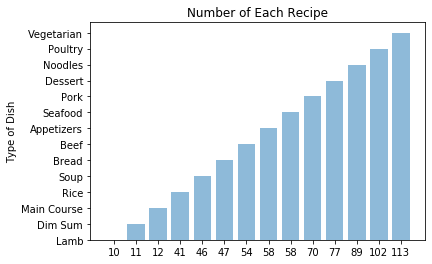

In [209]:
import matplotlib.pyplot as plt
import numpy as np

names = list(new_li['Category'])
y_pos = np.arange(len(names))
counts = list(new_li['counts'])

plt.bar(y_pos, names, align='center', alpha=0.5)
plt.xticks(y_pos, counts)
plt.ylabel('Type of Dish')
plt.title('Number of Each Recipe')

plt.show()


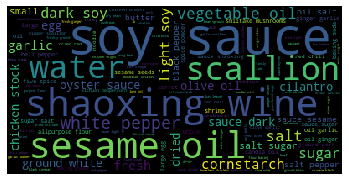

In [210]:
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(' '.join(data['Ingredients']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()